Image Segmentation Techniques for MRI Scans

In [2]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage as ndi
from skimage import filters, segmentation, color, measure, morphology


Define Binary Thresholding Function

<div style="font-size:85%">
  
1. Define a function that applies binary thresholding to an image.  
2. Use cv2.threshold with a specified threshold value.  
3. Return the binary image.  

</div>

In [3]:
def binary_thresholding(img, thresh_val=75):
    _, binary_img = cv2.threshold(img, thresh_val, 255, cv2.THRESH_BINARY)
    return binary_img

Define Otsu Thresholding Function

<div style="font-size:85%">
  
1. Define a function that applies Otsu thresholding to an image.  
2. Use cv2.threshold with THRESH_OTSU to automatically determine the threshold.  
3. Return the binary image.  

</div>

In [4]:
def otsu_thresholding(img):
    _, otsu_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_img

Define Watershed Segmentation Function

<div style="font-size:85%">
  
1. Define a function that performs watershed segmentation on an image.  
2. Apply Gaussian blur, Otsu thresholding, distance transform, and watershed algorithm.  
3. Return the segmented image with labels colored.  

</div>

In [5]:
def watershed_segmentation(img):
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_bool = binary > 0

    distance = ndi.distance_transform_edt(binary_bool)

    local_maxi = morphology.local_maxima(distance)
    markers = measure.label(local_maxi)

    sobel_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
    gradient = np.sqrt(sobel_x**2 + sobel_y**2)

    labels_ws = segmentation.watershed(gradient, markers, mask=binary_bool)
    return color.label2rgb(labels_ws, image=img, bg_label=0)

Load and Display Original Image

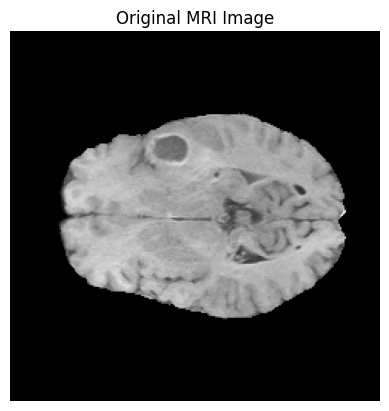

In [6]:
img = cv2.imread(r"C:\Users\rithv\GitHub\brain-mri-scans\code\images\80.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original MRI Image")
plt.axis('off')
plt.show()

Compare Thresholding Methods

<div style="font-size:85%">
  
1. Create a subplot figure to display multiple images.  
2. Show the original image.  
3. Apply all thresholding methods and display.  

</div>

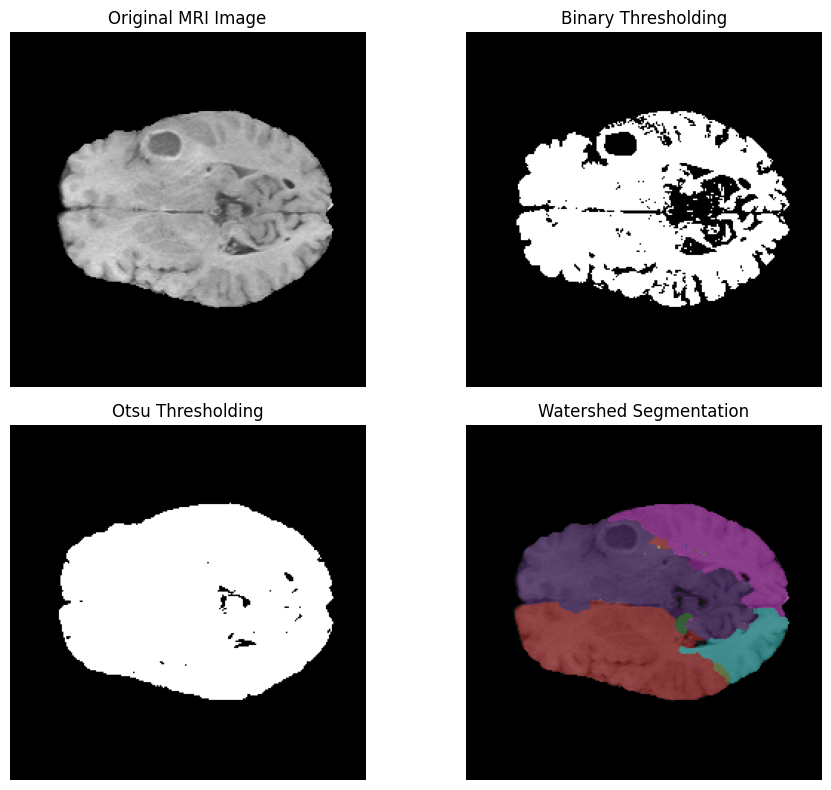

In [7]:
# Display Original Image
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original MRI Image")
plt.axis('off')

# Binary Thresholding
binary_img = binary_thresholding(img)
plt.subplot(2, 2, 2)
plt.imshow(binary_img, cmap='gray')
plt.title("Binary Thresholding")
plt.axis('off')

# Otsu Thresholding
otsu_img = otsu_thresholding(img)
plt.subplot(2, 2, 3)
plt.imshow(otsu_img, cmap='gray')
plt.title("Otsu Thresholding")
plt.axis('off')

# Watershed Segmentation
watershed_img = watershed_segmentation(img)
plt.subplot(2, 2, 4)
plt.imshow(watershed_img)
plt.title("Watershed Segmentation")
plt.axis('off')

plt.tight_layout()
plt.show()